# INF1032 - Trabalho 1.1 - Análise discritiva de dados de PG
### Alunos: Leonardo Wajnsztok e Samuel Bastos

## Datasets

In [138]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

docentes  = pd.read_csv('2018-05-02/docentes.csv')
discentes = pd.read_csv('2018-05-02/discentes.csv')
producao  = pd.read_csv('2018-05-02/producao.csv')
trabalhos = pd.read_csv('2018-05-02/trabalhos.csv')

## Docentes

In [139]:
print (docentes.shape)
docentes.head(2)

(487, 4)


,categoria,ies,nome,prof_id
0,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,ALBERTO BARBOSA RAPOSO,45079
1,PERMANENTE,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,ALESSANDRO FABRICIO GARCIA,45076


## Discentes

In [140]:
print (discentes.shape)
discentes.head(2)

(4049, 15)


,abrev,curso,data_matricula,deficiencia,discente_id,ies,nacionalidade,nivel,nome,orientador,orientadores,programa,raca,sexo,situacao
0,"LEON, A. C. (Principal)",INFORMÁTICA,03/08/2015,Não,889714,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Cuba,Mestrado,ADRIAN CONCEPCION LEON,MARKUS ENDLER,"[{'nome': 'MARKUS ENDLER', 'categoria': 'Docen...",INFORMÁTICA(31005012004P9),Não declarado,Masculino,MATRICULADO
1,"HERNANDEZ, A. G. (Principal)",INFORMÁTICA,02/03/2015,Não,838354,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,Brasil,Mestrado,ADRIEL GARCIA HERNANDEZ,RUY LUIZ MILIDIU,"[{'nome': 'RUY LUIZ MILIDIU', 'categoria': 'Do...",INFORMÁTICA(31005012004P9),Não declarado,Masculino,TITULADO


## Produção

In [141]:
print (producao.shape)
producao.head(2)

(2847, 35)


,anais_titulo,ano,area,cidade,dict_paper_autores,divulgacao,doi,edicao,editora,evento,...,paper_id,periodico,programa,projeto,serie,subtipo,tipo,titulo,url,volume
0,NaN,2017,REDES DE COMPUTADORES E SISTEMAS DISTRIBUÍDOS,New York,"[{'nome': 'BERTO DE TACIO PEREIRA GOMES', 'cat...",MEIO DIGITAL,DOI: 10.1002/cpe.4043,NaN,Wiley,NaN,...,5583631,(1532-0634) CONCURRENY AND COMPUTATION (ONLINE),INFORMÁTICA (31005012004P9),NÃO INFORMADO,-,ARTIGO EM PERIÓDICO,BIBLIOGRÁFICA,A COMPREHENSIVE AND SCALABLE MIDDLEWARE FOR AM...,http://onlinelibrary.wiley.com/doi/10.1002/cpe...,29
1,Proceedings of XVI Brazilian Symposium of Comp...,2017,COMPUTAÇÃO GRÁFICA,Curitiba,"[{'nome': 'PEDRO IGOR PORFIRIO SAMPAIO', 'cate...",MEIO DIGITAL,NaN,16,NaN,Simposio Brasileiro de Jogos e Entretenimento ...,...,5310280,NaN,INFORMÁTICA (31005012004P9),NÃO INFORMADO,-,TRABALHO EM ANAIS,BIBLIOGRÁFICA,A FAST APPROACH FOR AUTOMATIC GENERATION OF PO...,http://https://www.sbgames.org/sbgames2017/pap...,1


## Trabalhos

In [142]:
print (trabalhos.shape)
trabalhos.head(2)

(642, 20)


,abstract,anexo,area,autor,biblioteca,data_defesa,idioma,ies,keywords,linha,orientador,paginas,palavras_chave,programa,projeto_pesquisa,resumo,tipo,titulo,trabalho_id,volume
0,Spatial concentrations (or spatial clusters) o...,Marcos P. Roriz_2017_Completo.pdf,REDES DE COMPUTADORES E SISTEMAS DISTRIBUÍDOS,MARCOS PAULINO RORIZ JUNIOR,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,22/03/2017,INGLES,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,b'Spatial Clustering;Stream Clustering;Real-ti...,"REDES MÓVEIS, COMPUTAÇÃO UBÍQUA E COMPUTAÇÃO A...",MARKUS ENDLER,121.0,Aglomeração Espacial;Aglomeração em Fluxo de D...,INFORMÁTICA (31005012004P9),-,"Clusters (ou concentrações) de objetos móveis,...",TESE,DG2CEP: An On-line Algorithm for Real-time Det...,5013040,1
1,Quotation Extraction consists of identifying q...,Rafael dos Reis_2017_Completo.pdf,OTIMIZAÇÃO E RACIOCÍNIO AUTOMÁTICO,RAFAEL DOS REIS SILVA,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,08/02/2017,INGLES,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JAN...,b'Machine Learning;Natural Language Processing...,"APRENDIZADO DE MÁQUINA, RACIOCÍNIO HEURÍSTICO ...",RUY LUIZ MILIDIU,59.0,Processamento de Linguagem Natural;Extração de...,INFORMÁTICA (31005012004P9),-,A Extração de Citações consiste na identificaç...,DISSERTAÇÃO,Direct and Indirect Quotation Extraction for P...,5013130,1


## Funções auxiliares

In [143]:
def plot_bar_result(x, y, title=''):
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 12)
    ax = sns.barplot(x=x, y=y, ax=ax)
    ax.set_title(title)
    for p in ax.patches:
        width = p.get_width()
        ax.text(width + 0.5  ,
                p.get_y()+p.get_height()/2. + 0.2,
                '{}'.format(width),
                ha="center")

# 1) Quantos professores (docentes) havia em cada programa em 2017,  em cada quadro (permanente, colaborador, visitante)? 

,categoria,COLABORADOR,PERMANENTE
programa,ies_x,,
CIÊNCIA DA COMPUTAÇÃO(33002010176P0),UNIVERSIDADE DE SÃO PAULO,4.0,34.0
CIÊNCIA DA COMPUTAÇÃO(33003017005P8),UNIVERSIDADE ESTADUAL DE CAMPINAS,6.0,41.0
CIÊNCIA DA COMPUTAÇÃO(42005019016P8),PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO GRANDE DO SUL,NaN,23.0
CIÊNCIAS DA COMPUTAÇÃO E MATEMÁTICA COMPUTACIONAL(33002045004P1),UNIVERSIDADE DE SÃO PAULO ( SÃO CARLOS ),6.0,63.0
CIÊNCIAS DA COMPUTAÇÃO(25001019004P6),UNIVERSIDADE FEDERAL DE PERNAMBUCO,14.0,68.0
CIÊNCIAS DA COMPUTAÇÃO(32001010004P6),UNIVERSIDADE FEDERAL DE MINAS GERAIS,5.0,47.0
COMPUTAÇÃO(31003010046P4),UNIVERSIDADE FEDERAL FLUMINENSE,1.0,39.0
COMPUTAÇÃO(42001013004P4),UNIVERSIDADE FEDERAL DO RIO GRANDE DO SUL,3.0,52.0
INFORMÁTICA(31001017110P8),UNIVERSIDADE FEDERAL DO RIO DE JANEIRO,2.0,26.0


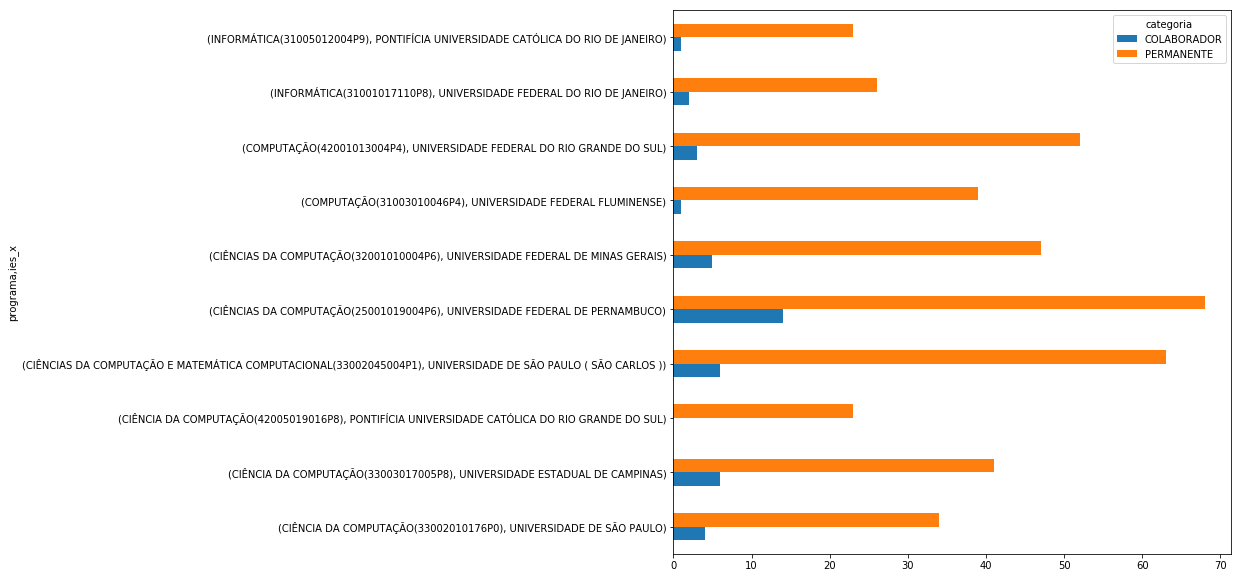

In [144]:
doscentes_discentes = pd.merge(docentes, discentes, how='inner', left_on='nome', right_on='orientador')

# agora é necessário remover tuplas com 'orientador' duplicado
doscentes_unicos = doscentes_discentes.drop_duplicates(subset='orientador')
doscentes_unicos_prog_cat = doscentes_unicos.groupby(['programa', 'ies_x', 'categoria']).size().unstack('categoria')
doscentes_unicos_prog_cat.plot.barh(legend=True, figsize=(10,10))
doscentes_unicos_prog_cat

# 2) Quantos alunos (discentes) de Mestrado/Doutorado havia em cada programa em 2017?

,nivel,Doutorado,Mestrado
ies,programa,,
PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO DE JANEIRO (PUC-RIO),INFORMÁTICA(31005012004P9),102,115
PONTIFÍCIA UNIVERSIDADE CATÓLICA DO RIO GRANDE DO SUL (PUC/RS),CIÊNCIA DA COMPUTAÇÃO(42005019016P8),91,137
UNIVERSIDADE DE SÃO PAULO ( SÃO CARLOS ) (USP/SC),CIÊNCIAS DA COMPUTAÇÃO E MATEMÁTICA COMPUTACIONAL(33002045004P1),319,173
UNIVERSIDADE DE SÃO PAULO (USP),CIÊNCIA DA COMPUTAÇÃO(33002010176P0),111,133
UNIVERSIDADE ESTADUAL DE CAMPINAS (UNICAMP),CIÊNCIA DA COMPUTAÇÃO(33003017005P8),169,183
UNIVERSIDADE FEDERAL DE MINAS GERAIS (UFMG),CIÊNCIAS DA COMPUTAÇÃO(32001010004P6),193,270
UNIVERSIDADE FEDERAL DE PERNAMBUCO (UFPE),CIÊNCIAS DA COMPUTAÇÃO(25001019004P6),379,337
UNIVERSIDADE FEDERAL DO RIO DE JANEIRO (UFRJ),INFORMÁTICA(31001017110P8),63,110
UNIVERSIDADE FEDERAL DO RIO GRANDE DO SUL (UFRGS),COMPUTAÇÃO(42001013004P4),125,194


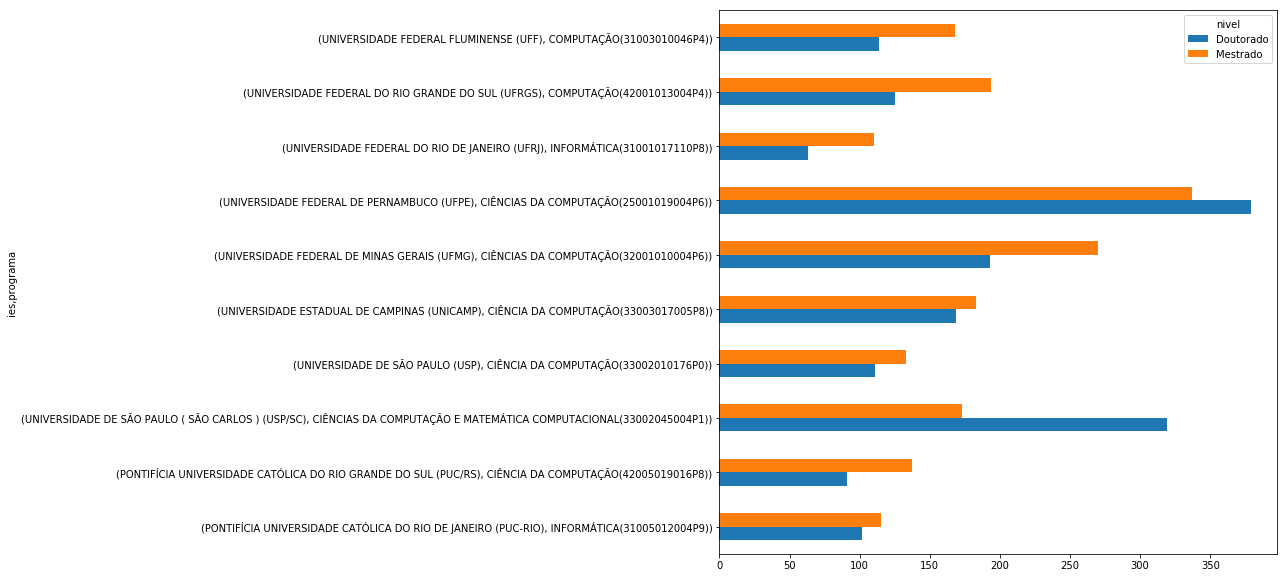

In [145]:
discente_pos = discentes.loc[discentes['nivel'] != 'Graduação', discentes.columns]
discentes_programa = discente_pos.groupby(['ies', 'programa', 'nivel']).size().unstack('nivel')
discentes_programa.plot.barh(figsize=(10,10))
discentes_programa

## 3) Qual foi a taxa de alunos de Mestrado/Doutorado por professor do quadro permanente em cada programa em 2017?

programa                                                          nivel    
CIÊNCIA DA COMPUTAÇÃO(33002010176P0)                              Doutorado     3
                                                                  Mestrado      5
CIÊNCIA DA COMPUTAÇÃO(33003017005P8)                              Doutorado     9
                                                                  Mestrado     10
CIÊNCIAS DA COMPUTAÇÃO E MATEMÁTICA COMPUTACIONAL(33002045004P1)  Doutorado     5
                                                                  Mestrado     10
CIÊNCIAS DA COMPUTAÇÃO(25001019004P6)                             Doutorado    27
                                                                  Mestrado     35
CIÊNCIAS DA COMPUTAÇÃO(32001010004P6)                             Doutorado     3
                                                                  Mestrado      7
COMPUTAÇÃO(31003010046P4)                                         Doutorado     1
COMPUTAÇÃO(42001013004

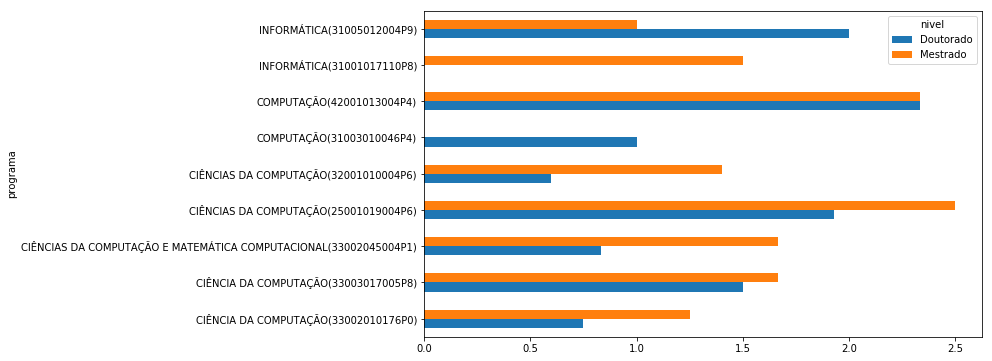

In [210]:
programas = doscentes_discentes.programa.unique()
doscentes_discentes_pos = doscentes_discentes.loc[
    (doscentes_discentes['nivel'] != 'Graduação') &
    (doscentes_discentes['categoria'] != 'PERMANENTE')
    , doscentes_discentes.columns]

discentes_por_programa = doscentes_discentes_pos.groupby(['programa', 'nivel']).size()
doscentes_por_programa = doscentes_discentes_pos.drop_duplicates('orientador').groupby('programa').size()
taxa_alunos_por_professor_programa = discentes_por_programa / doscentes_por_programa

taxa_alunos_por_professor_programa.unstack('nivel').plot.barh(figsize=(10,6))
discentes_por_programa

## 4) Qual foi a distribuição de alunos de Mestrado/Doutorado pelos professores de cada programa em 2017?

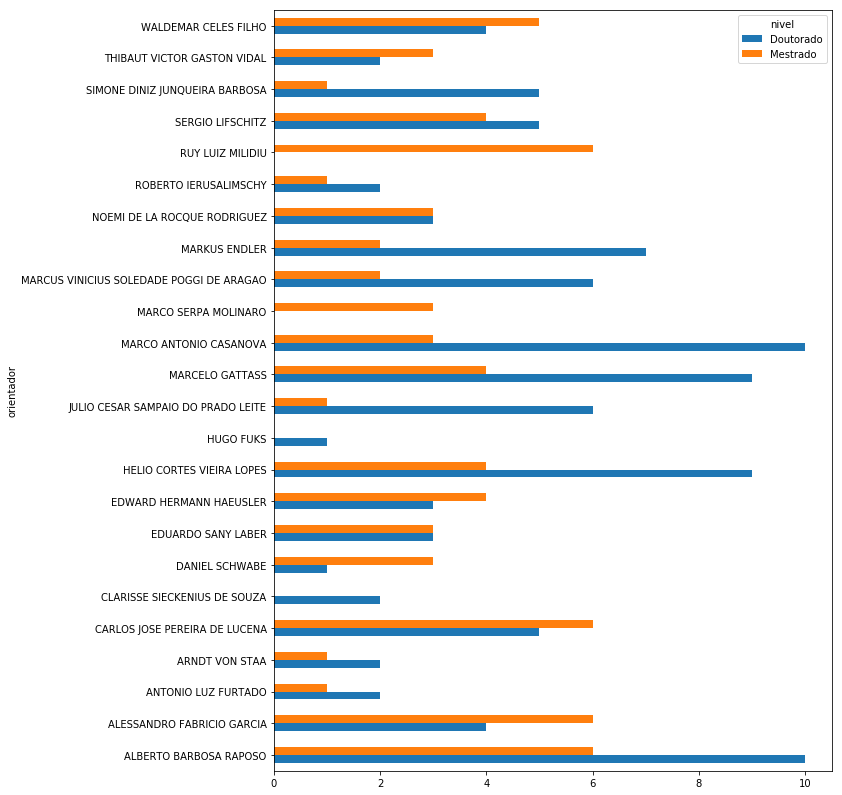

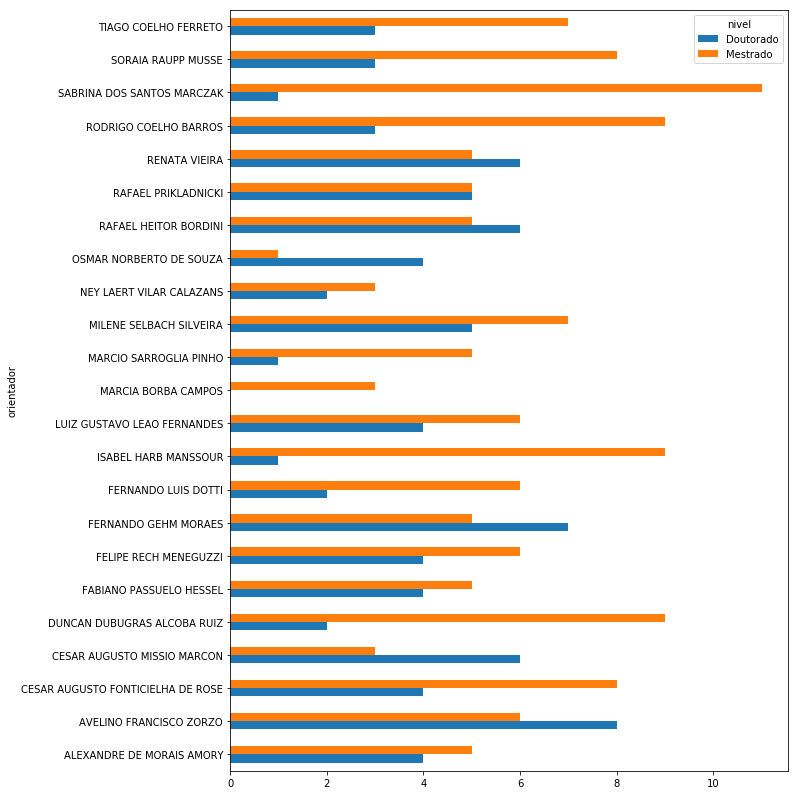

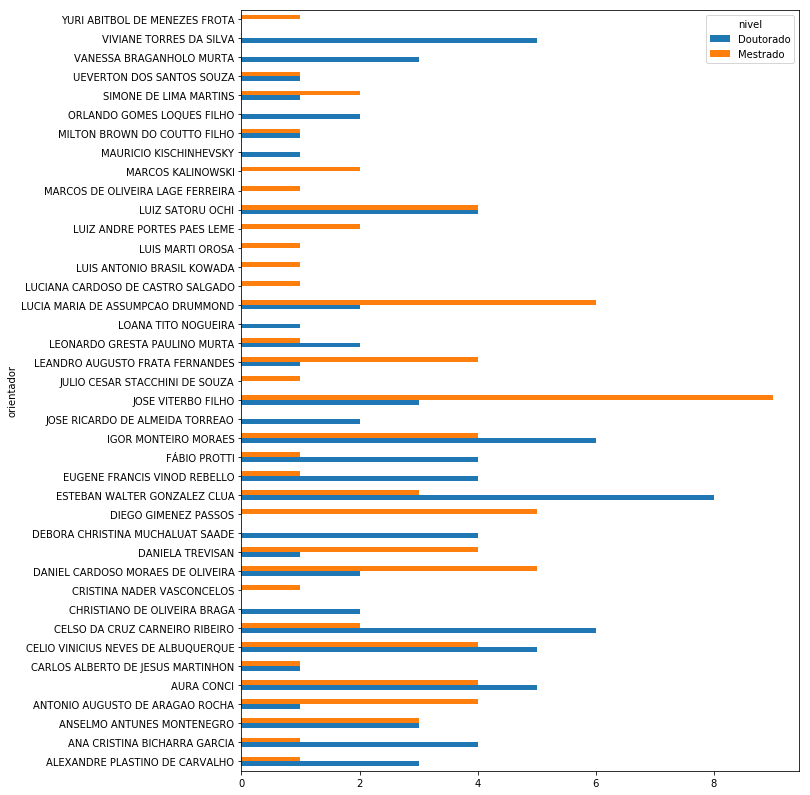

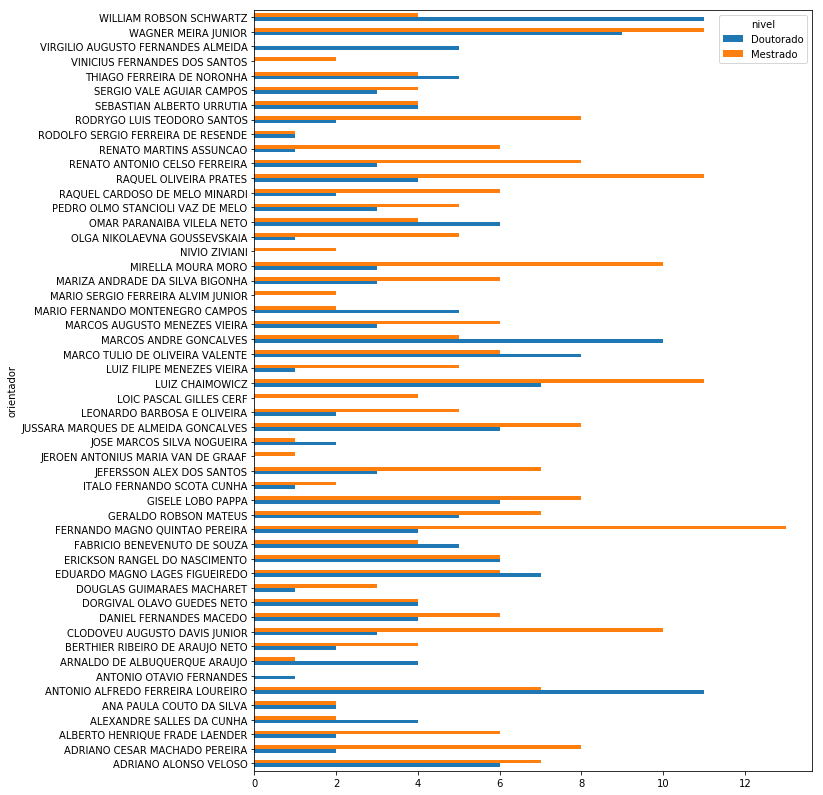

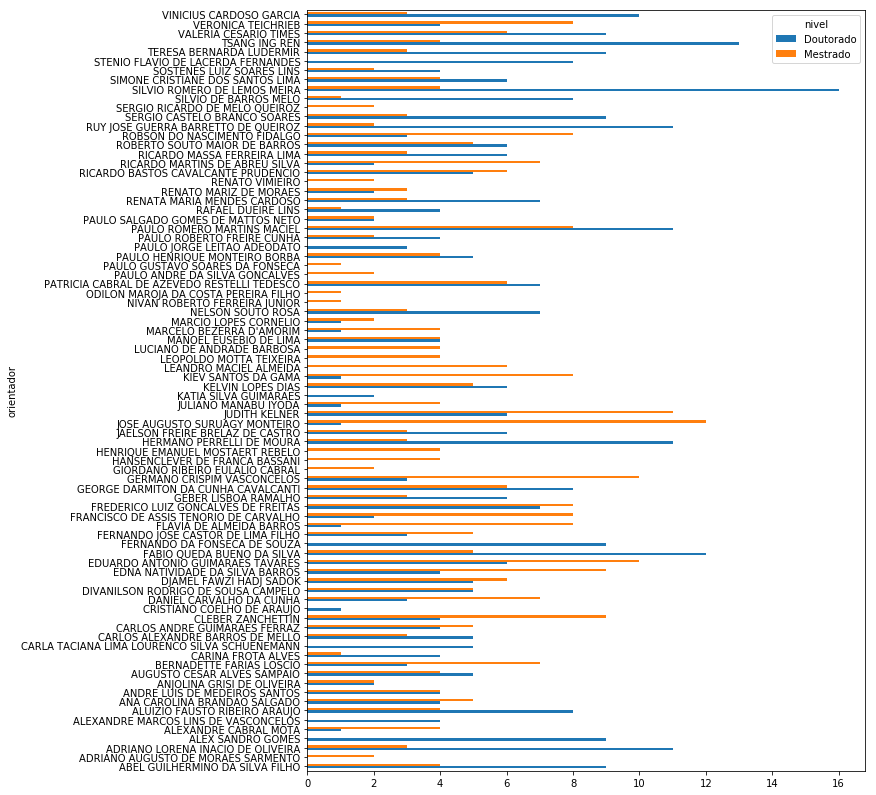

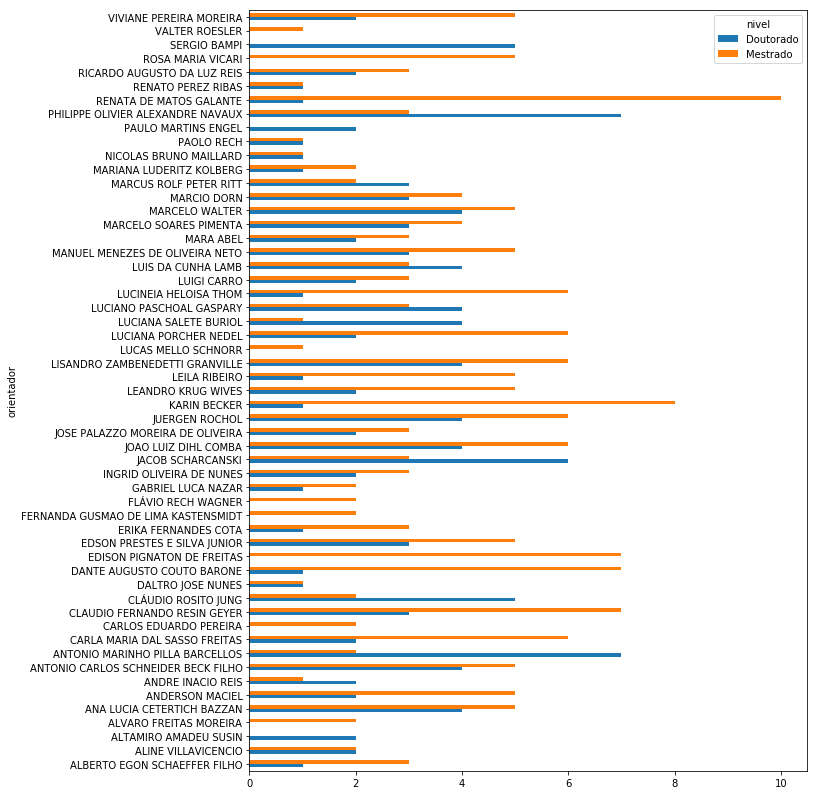

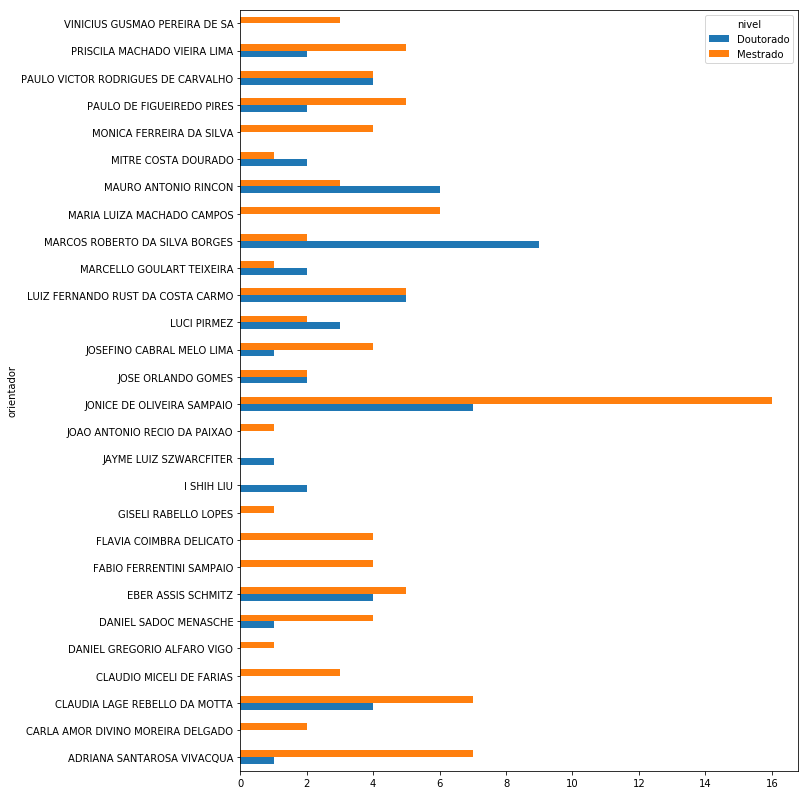

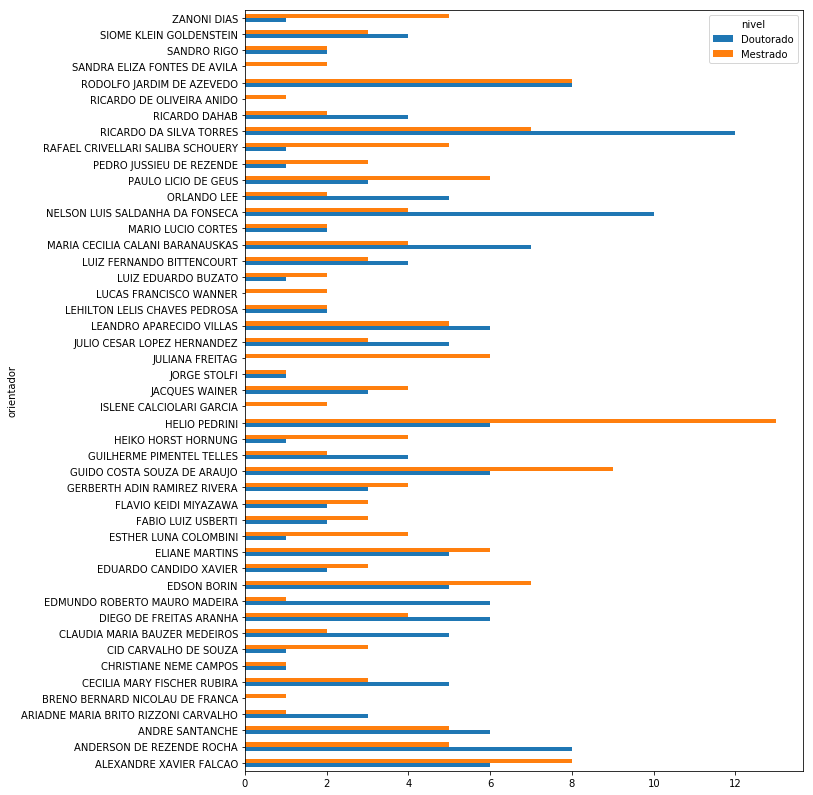

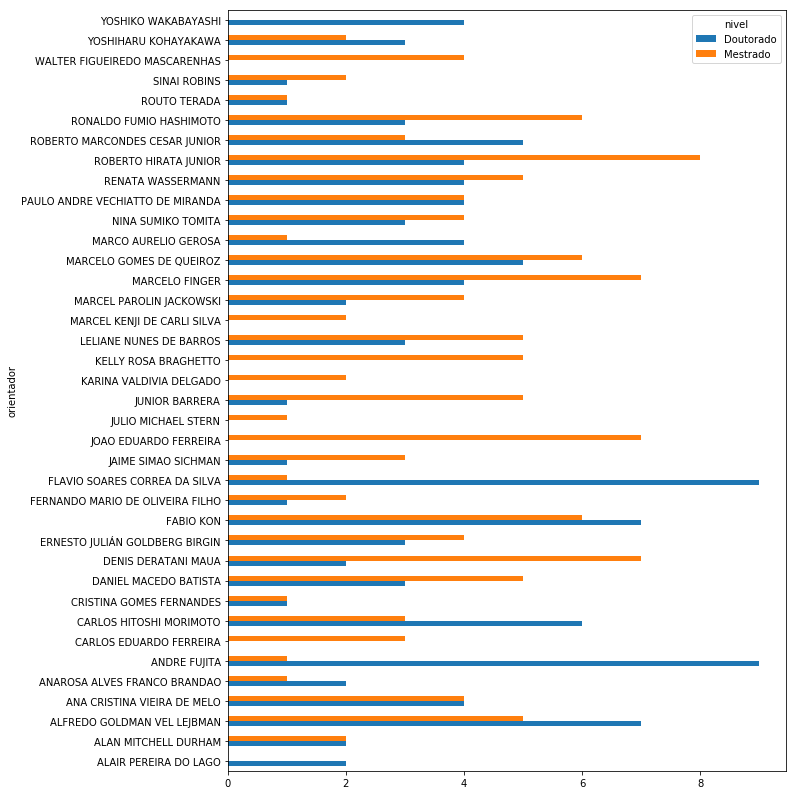

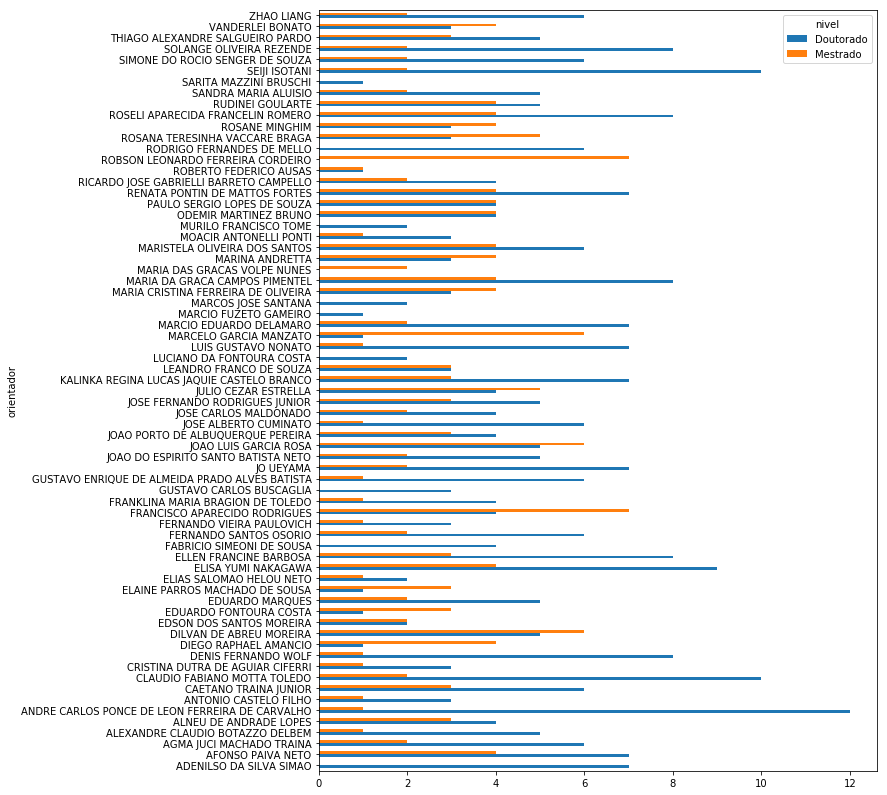

In [208]:
aluno_prof = pd.merge(docentes, discentes, how='inner', left_on='nome', right_on='orientador')
aluno_prof = aluno_prof[aluno_prof.nivel != 'Graduação']
aluno_prof_dist = aluno_prof.groupby(['programa', 'orientador', 'nivel']).size().unstack('nivel').reset_index()
aluno_prof_dist

for p in aluno_prof.programa.unique():
    aluno_prof_dist_programa = aluno_prof_dist[aluno_prof_dist.programa == p].set_index('orientador')
    aluno_prof_dist_programa.plot.barh(figsize=(10,len(aluno_prof_dist_programa.)))

## 5) Quantos alunos de Mestrado/Doutorado defenderam suas dissertações/teses em 2017 (arquivo trabalhos.csv)?

In [6]:
# precisa filtrar os nulos (verificar nas outras questões também se é necessário)
trabalhos = trabalhos[trabalhos.abstract.isnull() == False]
trabalhos = trabalhos[trabalhos.area != '-']
trabalhos.shape

(590, 20)

## 6) Como os trabalhos de Mestrado/Doutorado defendidos em 2017 foram distribuídos pelas áreas de pesquisa dos programas?

In [7]:
# Fazer gráfico (?)
#trabalhos.tipo.unique()
#trabalhos.area.unique()
# Precisa fazer groupby por programa também (?)
trabalhos_areas = trabalhos.groupby(['programa','area']).size()
display(trabalhos_areas)

programa                                                           area                                              
CIÊNCIA DA COMPUTAÇÃO (33002010176P0)                              CIÊNCIA DA COMPUTAÇÃO                                 52
CIÊNCIA DA COMPUTAÇÃO (33003017005P8)                              ENGENHARIA DA INFORMAÇÃO                              22
                                                                   SISTEMAS DE COMPUTAÇÃO                                14
                                                                   TEORIA DA COMPUTAÇÃO                                   4
CIÊNCIA DA COMPUTAÇÃO (42005019016P8)                              CIÊNCIA DA COMPUTAÇÃO                                 44
CIÊNCIAS DA COMPUTAÇÃO (25001019004P6)                             ARQUITETURA DE COMPUTADORES E SISTEMAS DIGITAIS        3
                                                                   BANCO DE DADOS                                         8
              

## 7) Como as defesas de Mestrado/Doutorado foram distribuídas ao longo do ano de 2017?

In [8]:
trabalhos.data_defesa = pd.to_datetime(trabalhos.data_defesa)
# Necessário ordenar por data para possuir uma distribuição correta ao longo do tempo
trabalhos_sort = trabalhos.sort_values(by='data_defesa')
trabalhos_sort.head()
#trabalhos_sort.describe()

tsJan = trabalhos_sort[(trabalhos_sort['data_defesa'] > '2017-01-01') & (trabalhos_sort['data_defesa'] <= '2017-02-01')]
tsFev = trabalhos_sort[(trabalhos_sort['data_defesa'] > '2017-02-01') & (trabalhos_sort['data_defesa'] <= '2017-03-01')]
tsMar = trabalhos_sort[(trabalhos_sort['data_defesa'] > '2017-03-01') & (trabalhos_sort['data_defesa'] <= '2017-04-01')]
tsAbr = trabalhos_sort[(trabalhos_sort['data_defesa'] > '2017-04-01') & (trabalhos_sort['data_defesa'] <= '2017-05-01')]
tsMai = trabalhos_sort[(trabalhos_sort['data_defesa'] > '2017-05-01') & (trabalhos_sort['data_defesa'] <= '2017-06-01')]
tsJun = trabalhos_sort[(trabalhos_sort['data_defesa'] > '2017-06-01') & (trabalhos_sort['data_defesa'] <= '2017-07-01')]
tsJul = trabalhos_sort[(trabalhos_sort['data_defesa'] > '2017-07-01') & (trabalhos_sort['data_defesa'] <= '2017-08-01')]
tsAgo = trabalhos_sort[(trabalhos_sort['data_defesa'] > '2017-08-01') & (trabalhos_sort['data_defesa'] <= '2017-09-01')]
tsSet = trabalhos_sort[(trabalhos_sort['data_defesa'] > '2017-09-01') & (trabalhos_sort['data_defesa'] <= '2017-10-01')]
tsOut = trabalhos_sort[(trabalhos_sort['data_defesa'] > '2017-10-01') & (trabalhos_sort['data_defesa'] <= '2017-11-01')]
tsNov = trabalhos_sort[(trabalhos_sort['data_defesa'] > '2017-11-01') & (trabalhos_sort['data_defesa'] <= '2017-12-01')]
tsDez = trabalhos_sort[(trabalhos_sort['data_defesa'] > '2017-12-01') & (trabalhos_sort['data_defesa'] <= '2018-01-01')]

# fazer plot meses x quantidade

## 8) Qual fração de alunos de Mestrado/Doutorado (do total em cada programa) defendeu em 2017?

In [9]:
# muda coluna nome para autor para inner join, discente_aux já removeu 'Graduação'
discente_aux.rename(columns={'nome':'autor'}, inplace=True)
dt = pd.merge(discente_aux, trabalhos_sort, how='inner', on='autor')
discentes.shape # discentes = 4049 rows (total de discentes)
discentes_programa = discentes.groupby('programa').size()
dt_programa = dt.groupby('programa_y').size()

frac = pd.Series()
for program in programs:
    frac[program] = 0.0
    
i = 0
while i < 10:
    frac[i] = dt_programa[i] / discentes_programa[i]
    i+=1

frac

CIÊNCIA DA COMPUTAÇÃO(33002010176P0)                                0.233607
CIÊNCIA DA COMPUTAÇÃO(33003017005P8)                                0.133333
CIÊNCIA DA COMPUTAÇÃO(42005019016P8)                                0.214912
CIÊNCIAS DA COMPUTAÇÃO(25001019004P6)                               0.194444
CIÊNCIAS DA COMPUTAÇÃO(32001010004P6)                               0.121739
CIÊNCIAS DA COMPUTAÇÃO E MATEMÁTICA COMPUTACIONAL(33002045004P1)    0.163090
COMPUTAÇÃO(31003010046P4)                                           0.194719
COMPUTAÇÃO(42001013004P4)                                           0.175281
INFORMÁTICA(31001017110P8)                                          0.121739
INFORMÁTICA(31005012004P9)                                          0.197248
dtype: float64

## 9) Quantos artigos de periódico/trabalhos em anais foram publicados por cada programa em 2017?

In [10]:
producao.head()
types = ['ARTIGO EM PERIÓDICO', 'TRABALHO EM ANAIS']
producao_pa = producao[producao.subtipo.isin(types)]
producao_pa_prog = producao_pa.groupby('programa').size()
display(producao_pa_prog)

programa
CIÊNCIA DA COMPUTAÇÃO (33002010176P0)                                156
CIÊNCIA DA COMPUTAÇÃO (33003017005P8)                                240
CIÊNCIA DA COMPUTAÇÃO (42005019016P8)                                183
CIÊNCIAS DA COMPUTAÇÃO (25001019004P6)                               309
CIÊNCIAS DA COMPUTAÇÃO (32001010004P6)                               316
CIÊNCIAS DA COMPUTAÇÃO E MATEMÁTICA COMPUTACIONAL (33002045004P1)    370
COMPUTAÇÃO (31003010046P4)                                           193
COMPUTAÇÃO (42001013004P4)                                           229
INFORMÁTICA (31001017110P8)                                          122
INFORMÁTICA (31005012004P9)                                          137
dtype: int64

## 10) Qual é a taxa de artigos de periódico/trabalhos em anais por número de docentes permanentes de cada programa em 2017?

In [11]:
dd_1_ndupl_perma = dd_1_ndupl.loc[dd_1_ndupl['categoria'] == 'PERMANENTE', dd_1_ndupl.columns]
perma = dd_1_ndupl_perma.groupby(['programa']).size()
perma

rate = pd.Series()
rate['CIÊNCIA DA COMPUTAÇÃO (33002010176P0)'] = producao_pa_prog['CIÊNCIA DA COMPUTAÇÃO (33002010176P0)'] / perma['CIÊNCIA DA COMPUTAÇÃO(33002010176P0)']
rate['CIÊNCIA DA COMPUTAÇÃO (33003017005P8)'] = producao_pa_prog['CIÊNCIA DA COMPUTAÇÃO (33003017005P8)'] / perma['CIÊNCIA DA COMPUTAÇÃO(33003017005P8)']
rate['CIÊNCIA DA COMPUTAÇÃO (42005019016P8)'] = producao_pa_prog['CIÊNCIA DA COMPUTAÇÃO (42005019016P8)'] / perma['CIÊNCIA DA COMPUTAÇÃO(42005019016P8)']
rate['CIÊNCIAS DA COMPUTAÇÃO (25001019004P6)'] = producao_pa_prog['CIÊNCIAS DA COMPUTAÇÃO (25001019004P6)'] / perma['CIÊNCIAS DA COMPUTAÇÃO(25001019004P6)']
rate['CIÊNCIAS DA COMPUTAÇÃO (32001010004P6)'] = producao_pa_prog['CIÊNCIAS DA COMPUTAÇÃO (32001010004P6)'] / perma['CIÊNCIAS DA COMPUTAÇÃO(32001010004P6)']
rate['CIÊNCIAS DA COMPUTAÇÃO E MATEMÁTICA COMPUTACIONAL (33002045004P1)'] = producao_pa_prog['CIÊNCIAS DA COMPUTAÇÃO E MATEMÁTICA COMPUTACIONAL (33002045004P1)'] / perma['CIÊNCIAS DA COMPUTAÇÃO E MATEMÁTICA COMPUTACIONAL(33002045004P1)']
rate['COMPUTAÇÃO (31003010046P4)'] = producao_pa_prog['COMPUTAÇÃO (31003010046P4)'] / perma['COMPUTAÇÃO(31003010046P4)']
rate['COMPUTAÇÃO (42001013004P4)'] = producao_pa_prog['COMPUTAÇÃO (42001013004P4)'] / perma['COMPUTAÇÃO(42001013004P4)']
rate['INFORMÁTICA (31001017110P8)'] = producao_pa_prog['INFORMÁTICA (31001017110P8)'] / perma['INFORMÁTICA(31001017110P8)']
rate['INFORMÁTICA (31005012004P9)'] = producao_pa_prog['INFORMÁTICA (31005012004P9)'] / perma['INFORMÁTICA(31005012004P9)']
rate

CIÊNCIA DA COMPUTAÇÃO (33002010176P0)                                4.588235
CIÊNCIA DA COMPUTAÇÃO (33003017005P8)                                5.853659
CIÊNCIA DA COMPUTAÇÃO (42005019016P8)                                7.956522
CIÊNCIAS DA COMPUTAÇÃO (25001019004P6)                               4.544118
CIÊNCIAS DA COMPUTAÇÃO (32001010004P6)                               6.723404
CIÊNCIAS DA COMPUTAÇÃO E MATEMÁTICA COMPUTACIONAL (33002045004P1)    5.873016
COMPUTAÇÃO (31003010046P4)                                           4.948718
COMPUTAÇÃO (42001013004P4)                                           4.403846
INFORMÁTICA (31001017110P8)                                          4.692308
INFORMÁTICA (31005012004P9)                                          5.956522
dtype: float64

## 11) Qual fração de artigos de periódico/trabalhos em anais publicados em 2017 teve a coautoria de discentes?

In [12]:
# 'num_discentes', 'num_docentes', 'num_externos'
# 2255 (total) -> 1416 (com discentes)
producao_pa_disc = producao_pa.loc[producao_pa['num_discentes'] != 0, producao_pa.columns]
producao_pa_disc.shape
print(1416/2255)

0.6279379157427938


## 12) Qual fração de artigos de periódico/trabalhos em anais publicados em 2017 teve a coautoria de participantes externos?

In [13]:
# 2255 (total) -> 1731 (com externos)
producao_pa_ext = producao_pa.loc[producao_pa['num_externos'] != 0, producao_pa.columns]
producao_pa_ext.shape
print(1731/2255)

0.7676274944567627


## 13) Qual é a distribuição de artigos de periódico publicados em 2017, por estrato do Qualis?

In [14]:
qualisRaw  = pd.read_excel('C:/Users/Sam/Downloads/t1ds/2018-05-02/Qualis-CC-2013-2016.xlsx')
qualis = qualisRaw
#qualis_estrato = qualis.groupby('Estrato').size()
#display(qualis_estrato)

producao_artigo = producao.loc[producao['subtipo'] == 'ARTIGO EM PERIÓDICO', producao.columns]
producao_artigo.rename(columns={'issn':'ISSN'}, inplace=True)

pq = pd.merge(producao_artigo, qualis, how='inner', on='ISSN')
pq_estrato = pq.groupby('Estrato').size()
display(pq_estrato)

Estrato
A1    185
A2    163
B1    152
B2     30
B3     78
B4     12
B5     36
C      23
dtype: int64

## 14) Considerando os pesos dos artigos de cada estrato do índice restrito ({'A1': 1, 'A2': 0.85, 'B1': 0.70}),  qual o índice restrito relativo de cada programa, considerando apenas os artigos em periódicos, e dividido pelo número de docentes permanentes (ordenado do maior para o menor)?

In [15]:
# perma -> possui numero de docentes permanentes de cada PROGRAMA

restrictTypes = ['A1', 'A2', 'B1']
programs = ['CIÊNCIA DA COMPUTAÇÃO (33002010176P0)', 'CIÊNCIA DA COMPUTAÇÃO (33003017005P8)', 'CIÊNCIA DA COMPUTAÇÃO (42005019016P8)'
           ,'CIÊNCIAS DA COMPUTAÇÃO (25001019004P6)', 'CIÊNCIAS DA COMPUTAÇÃO (32001010004P6)', 'CIÊNCIAS DA COMPUTAÇÃO E MATEMÁTICA COMPUTACIONAL (33002045004P1)'
           , 'COMPUTAÇÃO (31003010046P4)', 'COMPUTAÇÃO (42001013004P4)', 'INFORMÁTICA (31001017110P8)', 'INFORMÁTICA (31005012004P9)']

pq_restrict = pq[pq.Estrato.isin(restrictTypes)]
pq_restrict_pe = pq_restrict.groupby(['programa','Estrato']).size()
pq_restrict_pe
relative = pd.Series()

for program in programs:
    relative[program] = 0.0
    

for program in programs:
    for type in restrictTypes:
        if type not in pq_restrict_pe[program].index:
            continue
        if type == 'A1':
            relative[program] += pq_restrict_pe[program][type] * 1.0
        elif type == 'A2':
            relative[program] += pq_restrict_pe[program][type] * 0.85
        else:
            relative[program] += pq_restrict_pe[program][type] * 0.70

i=0
while i < 10:
    #print('Relative: ' + str(relative[i]) + ' Perma: ' + str(perma[i]))
    relative[i] /= perma[i]
    i+=1

relative.sort_values(ascending=False, inplace=True)
relative

CIÊNCIAS DA COMPUTAÇÃO E MATEMÁTICA COMPUTACIONAL (33002045004P1)    1.387234
INFORMÁTICA (31005012004P9)                                          1.304348
CIÊNCIA DA COMPUTAÇÃO (33003017005P8)                                1.302439
CIÊNCIA DA COMPUTAÇÃO (42005019016P8)                                1.150000
COMPUTAÇÃO (42001013004P4)                                           1.096154
CIÊNCIAS DA COMPUTAÇÃO (25001019004P6)                               0.960317
COMPUTAÇÃO (31003010046P4)                                           0.923077
CIÊNCIA DA COMPUTAÇÃO (33002010176P0)                                0.842647
CIÊNCIAS DA COMPUTAÇÃO (32001010004P6)                               0.777941
INFORMÁTICA (31001017110P8)                                          0.763462
dtype: float64

## 15) Considerando os pesos dos artigos de cada estrato do índice geral ({'A1': 1, 'A2': 0.85, 'B1': 0.70, 'B2': 0.50, 'B3': 0.20, 'B4': 0.10, 'B5': 0.05, 'C': 0.0}), qual o índice geral relativo de cada programa, considerando apenas os artigos em periódicos, e dividido pelo número de docentes permanentes (ordenado do maior para o menor)?

In [16]:


generalTypes = ['A1', 'A2', 'B1', 'B2', 'B3', 'B4', 'B5', 'C']
pq_general = pq[pq.Estrato.isin(generalTypes)]
pq_general_pe = pq_general.groupby(['programa','Estrato']).size()
pq_general_pe

relative = pd.Series()

for program in programs:
    relative[program] = 0.0
    
for program in programs:
    for type in generalTypes:
        if type not in pq_general_pe[program].index:
            continue
        if type == 'A1':
            relative[program] += pq_general_pe[program][type] * 1.0
        elif type == 'A2':
            relative[program] += pq_general_pe[program][type] * 0.85
        elif type == 'B1':
            relative[program] += pq_general_pe[program][type] * 0.70
        elif type == 'B2':
            relative[program] += pq_general_pe[program][type] * 0.50
        elif type == 'B3':
            relative[program] += pq_general_pe[program][type] * 0.20   
        elif type == 'B4':
            relative[program] += pq_general_pe[program][type] * 0.10
        elif type == 'B5':
            relative[program] += pq_general_pe[program][type] * 0.05
        else:
            relative[program] += 0.0
            
i=0
while i < 10:
    #print('Relative: ' + str(relative[i]) + ' Perma: ' + str(perma[i]))
    relative[i] /= perma[i]
    i+=1

relative.sort_values(ascending=False, inplace=True)
relative

CIÊNCIAS DA COMPUTAÇÃO E MATEMÁTICA COMPUTACIONAL (33002045004P1)    1.568085
INFORMÁTICA (31005012004P9)                                          1.415217
CIÊNCIA DA COMPUTAÇÃO (33003017005P8)                                1.382927
CIÊNCIA DA COMPUTAÇÃO (42005019016P8)                                1.226087
COMPUTAÇÃO (42001013004P4)                                           1.112500
CIÊNCIAS DA COMPUTAÇÃO (25001019004P6)                               1.034127
COMPUTAÇÃO (31003010046P4)                                           0.984615
CIÊNCIA DA COMPUTAÇÃO (33002010176P0)                                0.948529
CIÊNCIAS DA COMPUTAÇÃO (32001010004P6)                               0.845588
INFORMÁTICA (31001017110P8)                                          0.817308
dtype: float64